# check


In [8]:
# check xem tập test có đủ nhãn không :)))) 
path_test_folder = "../DATN_data/roboflow/v10/test/labels"
path_train_folder = "../DATN_data/roboflow/v10/train/labels"
test_set = set()
train_set = set()


In [12]:
import os
test_file_name_list = os.listdir(path_test_folder)
for test_file_name in test_file_name_list:
    with open("{}/{}".format(path_test_folder, test_file_name), "r") as f:
        line = f.readline()
        label = line.split(" ")[0]
        test_set.add(label)
train_file_name_list = os.listdir(path_train_folder)
for train_file_name in train_file_name_list:
    with open("{}/{}".format(path_train_folder, train_file_name), "r") as f:
        line = f.readline()
        label = line.split(" ")[0]
        train_set.add(label)
        

In [15]:
count = 0
for label in test_set:
    if label not in train_set:
        count+=1
        print("label {} not in train set".format(label))
print(count)

label 48 not in train set
1


##  tạo folder nếu chưa tồn tại 

In [25]:
import os
import shutil

root_v10 = "../DATN_data/roboflow/v10"
root_robo_sorted = "../DATN_data/robo_sorted/v10"
folder_type = "valid"
label_file_name_list = os.listdir("{}/{}/labels".format(root_v10, folder_type))
for label_file_name in label_file_name_list:
    image_file_name = label_file_name.replace(".txt",".jpg")
    source_label_file = "{}/{}/labels/{}".format(root_v10, folder_type, label_file_name)
    source_image_file = "{}/{}/images/{}".format(root_v10, folder_type, image_file_name)  
    with open(source_label_file, "r") as f:
        line = f.readline()
        label_folder_name = line.split(" ")[0]
        #if not exist in label ==> we create both labels, and images folder for each class
        if not os.path.exists(os.path.join(root_robo_sorted,"labels",label_folder_name)):
            os.mkdir(os.path.join(root_robo_sorted,"labels",label_folder_name))
            os.mkdir(os.path.join(root_robo_sorted,"images",label_folder_name))
        target_label_file = "{}/labels/{}/{}".format(root_robo_sorted,label_folder_name, label_file_name)
        target_image_file = "{}/images/{}/{}".format(root_robo_sorted,label_folder_name, image_file_name)
        print(label_file_name)
        print(image_file_name)
        
        
        shutil.copyfile(source_label_file, target_label_file)
        shutil.copyfile(source_image_file, target_image_file)
        
        

600_jpg.rf.a24eb3befe084d1fd0a706db39cd41a0.txt
600_jpg.rf.a24eb3befe084d1fd0a706db39cd41a0.jpg
320_jpg.rf.70d50e0e689ed3c9b722a39def26de38.txt
320_jpg.rf.70d50e0e689ed3c9b722a39def26de38.jpg
1320_jpg.rf.da4f0b603681547eac920d61a84e0530.txt
1320_jpg.rf.da4f0b603681547eac920d61a84e0530.jpg
350_jpg.rf.d94611f1c55cf114a072918a4d880829.txt
350_jpg.rf.d94611f1c55cf114a072918a4d880829.jpg
410_jpg.rf.ab2bde78756aab2984aa96256f708378.txt
410_jpg.rf.ab2bde78756aab2984aa96256f708378.jpg
1410_jpg.rf.273f75c8dbd928d3566ee8e48adc3fff.txt
1410_jpg.rf.273f75c8dbd928d3566ee8e48adc3fff.jpg
2020_jpg.rf.68a1d9149aeebe8329f9228268d5b065.txt
2020_jpg.rf.68a1d9149aeebe8329f9228268d5b065.jpg
650_jpg.rf.a25c75ee6c2c2da5c109b99185aea79f.txt
650_jpg.rf.a25c75ee6c2c2da5c109b99185aea79f.jpg
290_jpg.rf.6f030a5e4aa12fc5fdaf30d44f4038bd.txt
290_jpg.rf.6f030a5e4aa12fc5fdaf30d44f4038bd.jpg
130_jpg.rf.8bc7f4fa2663de95da791ac4f455ca3b.txt
130_jpg.rf.8bc7f4fa2663de95da791ac4f455ca3b.jpg
1278_jpg.rf.1f63a4bbcfa91634cb85c2

In [26]:
#Thay tên folder và tên file 
#mở file chứa tên class
#get all class name
with open("../DATN_data/roboflow/v10/data.yaml") as f:
    line = f.readline()
    while line:
        if line.startswith("names:"):
            break
        line = f.readline()
    classes = line.split(" ",1)[1]
    classes = eval(classes)
    

# Sửa tên folder ở images trước rồi kéo theo fix name folder in labels then


In [27]:
root_robo_sorted = "../DATN_data/robo_sorted/v10"
folder_name_list = os.listdir("{}/images".format(root_robo_sorted))
for folder_name in folder_name_list:
    folder_name_image_source = "{}/images/{}".format(root_robo_sorted, folder_name)
    folder_name_label_source = "{}/labels/{}".format(root_robo_sorted, folder_name)
    
    try:
        folder_name_image_target = "{}/images/{}".format(root_robo_sorted,folder_name +"_"+ classes[int(folder_name)])
        folder_name_label_target = "{}/labels/{}".format(root_robo_sorted,folder_name +"_"+ classes[int(folder_name)])
        os.rename(folder_name_image_source, folder_name_image_target)
        os.rename(folder_name_label_source, folder_name_label_target)
    except:
        pass
    
    

# rename file_name in each folder

In [28]:
# rename file name in image first and then label
root_folder_image_list = "../DATN_data/robo_sorted/v10/images"
root_folder_label_list = "../DATN_data/robo_sorted/v10/labels"
folder_name_list = os.listdir(root_folder_image_list)
for folder_name in folder_name_list:
    file_name_image_list  = os.listdir("{}/{}".format(root_folder_image_list, folder_name))
    for index, file_name_image in enumerate(file_name_image_list):
        source_image_file  = "{}/{}/{}".format(root_folder_image_list, folder_name, file_name_image)
        print(source_image_file)
        target_image_file  = "{}/{}/{}".format(root_folder_image_list, folder_name, folder_name+"__(" + str(index)+").jpg")
        print(target_image_file)
        # os.rename(source_image_file, target_image_file)
        source_label_file = "{}/{}/{}".format(root_folder_label_list, folder_name, file_name_image.replace(".jpg",".txt"))
        target_label_file = "{}/{}/{}".format(root_folder_label_list, folder_name, folder_name+"__(" + str(index)+").txt")
        os.rename(source_label_file, target_label_file)
        os.rename(source_image_file, target_image_file)
        
    
        

../DATN_data/robo_sorted/v10/images/40_siofor_1000/610_jpg.rf.a72ffb0107df17ce026bc38807c58795.jpg
../DATN_data/robo_sorted/v10/images/40_siofor_1000/40_siofor_1000__(0).jpg
../DATN_data/robo_sorted/v10/images/40_siofor_1000/620_jpg.rf.713b7b9faf3e9410bac0d40edc7d9d4c.jpg
../DATN_data/robo_sorted/v10/images/40_siofor_1000/40_siofor_1000__(1).jpg
../DATN_data/robo_sorted/v10/images/40_siofor_1000/750_jpg.rf.693b34fa041d3ca56aa34624fb86738f.jpg
../DATN_data/robo_sorted/v10/images/40_siofor_1000/40_siofor_1000__(2).jpg
../DATN_data/robo_sorted/v10/images/40_siofor_1000/1200_jpg.rf.2eb9455a4b6847da7b7e969c7363a0f6.jpg
../DATN_data/robo_sorted/v10/images/40_siofor_1000/40_siofor_1000__(3).jpg
../DATN_data/robo_sorted/v10/images/40_siofor_1000/220_jpg.rf.b64ecdc8454d6a50d24c9964641901e7.jpg
../DATN_data/robo_sorted/v10/images/40_siofor_1000/40_siofor_1000__(4).jpg
../DATN_data/robo_sorted/v10/images/40_siofor_1000/650_jpg.rf.c28e7b10e8f05606942a3cb72d9a1464.jpg
../DATN_data/robo_sorted/v10/i


# Draw bounding box

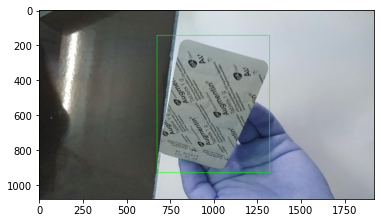

In [9]:
import cv2
image_path = "../DATN_data/robo_sorted/v10/images/9_augmentin/9_augmentin__(5).jpg"
im = cv2.imread(image_path)
# print("im shape: {}".format(im.shape))
hight, weight, _ = im.shape


import matplotlib.pyplot as plt


label_path = image_path.replace("images","labels").replace(".jpg",".txt")
with open(label_path, "r") as f:
    line = f.readline()
    # print(line.split())
    label,x, y ,w, h = [float(x) for x in line.split(" ")]

cv2.rectangle(im,(int((x-w/2)*weight),int((y-h/2)*hight)),(int((x+w/2)*weight),int((y+h/2)*hight)),(0,255,0),2)
plt.imshow(im)



In [4]:
print("hight: {}".format(hight))
print("weight: {}".format(weight))

hight: 1080
weight: 1920
